# preprocessing

In [1]:
#pip install tqdm


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [3]:
# Load dataset
file_path_new = "E:\Kuliah\SMSTR 7\Methopen\dataset_keypoint-silat\keypoints_output_silat.csv" #
file_path_old = "E:\Kuliah\CKLIPCI\dataset_keypoint-silat\keypoints_output.csv"  #
data = pd.read_csv(file_path_new)
dataO = pd.read_csv(file_path_old)


In [4]:
missing_values = data.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang dalam setiap kolom:
frame             0
x_0              32
y_0              32
z_0              32
visibility_0     32
                 ..
visibility_31    32
x_32             32
y_32             32
z_32             32
visibility_32    32
Length: 133, dtype: int64


In [5]:
missing_values = dataO.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang dalam setiap kolom:
frame             0
x_0              59
y_0              59
z_0              59
visibility_0     59
                 ..
visibility_31    59
x_32             59
y_32             59
z_32             59
visibility_32    59
Length: 133, dtype: int64


In [6]:
nan_counts = data.isna().sum()
print(nan_counts)

frame             0
x_0              32
y_0              32
z_0              32
visibility_0     32
                 ..
visibility_31    32
x_32             32
y_32             32
z_32             32
visibility_32    32
Length: 133, dtype: int64


In [7]:
nan_counts = dataO.isna().sum()
print(nan_counts)

frame             0
x_0              59
y_0              59
z_0              59
visibility_0     59
                 ..
visibility_31    59
x_32             59
y_32             59
z_32             59
visibility_32    59
Length: 133, dtype: int64


In [8]:
data_cleaned = data.dropna()
data_cleanedO = dataO.dropna()

In [9]:
nan_counts = data_cleaned.isna().sum()
print(nan_counts)
nan_counts = data_cleanedO.isna().sum()
print(nan_counts)

frame            0
x_0              0
y_0              0
z_0              0
visibility_0     0
                ..
visibility_31    0
x_32             0
y_32             0
z_32             0
visibility_32    0
Length: 133, dtype: int64
frame            0
x_0              0
y_0              0
z_0              0
visibility_0     0
                ..
visibility_31    0
x_32             0
y_32             0
z_32             0
visibility_32    0
Length: 133, dtype: int64


In [10]:
# Preprocessing: Normalize data
#keypoints_data = data_cleaned.drop(columns=['frame'])
keypoints_data = data_cleaned[[f'{axis}_{i}' for i in range(23, 33) for axis in ['x', 'y', 'z']]]
keypoints_dataO = data_cleanedO[[f'{axis}_{i}' for i in range(23, 33) for axis in ['x', 'y', 'z']]]

In [11]:
keypoints_data


,x_23,y_23,z_23,x_24,y_24,z_24,x_25,y_25,z_25,x_26,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,0.451331,0.465100,0.110175,0.457470,0.463318,-0.110182,0.491802,0.647482,0.058664,0.494906,...,0.055151,0.426306,0.924302,-0.221915,0.517143,0.894308,0.004046,0.501132,0.925217,-0.295127
1,0.445983,0.456778,0.122618,0.457885,0.462124,-0.122751,0.492286,0.643434,0.156030,0.499484,...,0.254441,0.427536,0.924301,-0.010263,0.512552,0.891011,0.218607,0.503602,0.925590,-0.075649
2,0.447754,0.457296,0.109594,0.461995,0.468286,-0.109642,0.491203,0.643520,0.110854,0.502191,...,0.199710,0.434158,0.924264,-0.056052,0.510417,0.891289,0.108223,0.508408,0.923520,-0.104632
3,0.481069,0.459294,0.094036,0.453831,0.464743,-0.094002,0.507123,0.624699,0.063444,0.502863,...,0.097747,0.433947,0.912512,-0.192276,0.513979,0.890291,0.031048,0.510414,0.920668,-0.274791
4,0.455134,0.450424,0.095158,0.461582,0.465288,-0.095123,0.505464,0.615279,0.065418,0.511254,...,0.070530,0.439040,0.909334,-0.113504,0.515233,0.872519,0.033617,0.515213,0.917149,-0.153827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.620565,0.441372,0.026862,0.557446,0.332072,-0.027091,0.460498,0.630542,-0.078618,0.527523,...,0.458809,0.368942,0.653099,-0.358963,0.268868,0.523369,0.317596,0.293836,0.750702,-0.538167
1332,0.605141,0.490309,-0.042360,0.557683,0.372101,0.042256,0.496481,0.417493,-0.401975,0.493805,...,-0.270680,0.275038,0.621983,-0.086367,0.277419,0.424645,-0.445442,0.221538,0.577980,-0.270467
1333,0.543936,0.587769,-0.067049,0.502650,0.459043,0.066849,0.520526,0.404340,-0.442934,0.318465,...,-0.427923,0.198408,0.657568,0.163175,0.271908,0.175829,-0.573997,0.125932,0.748765,0.030923
1334,0.542453,0.711479,-0.092000,0.496374,0.580509,0.092055,0.507593,0.484758,-0.424973,0.313446,...,-0.438564,0.209162,0.827162,0.042650,0.222844,0.415766,-0.557012,0.105067,0.770670,-0.023480


In [12]:
keypoints_dataO

,x_23,y_23,z_23,x_24,y_24,z_24,x_25,y_25,z_25,x_26,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,0.621221,0.514683,-0.087872,0.645220,0.509083,0.088017,0.564354,0.631956,-0.014500,0.619527,...,0.063803,0.649760,0.750286,0.409800,0.505359,0.784656,0.031496,0.613557,0.747111,0.402297
1,0.622005,0.514650,-0.086967,0.645218,0.509725,0.087127,0.564212,0.632446,-0.013601,0.619494,...,0.070955,0.646913,0.760282,0.376657,0.505366,0.783913,0.036235,0.603344,0.747112,0.356603
2,0.622797,0.514658,-0.086068,0.645223,0.509828,0.086224,0.564213,0.632748,-0.011316,0.619496,...,0.076177,0.645662,0.761630,0.387995,0.505391,0.783770,0.041847,0.600173,0.746989,0.370394
3,0.623563,0.515553,-0.084986,0.645362,0.510004,0.085127,0.564212,0.633058,-0.007344,0.619751,...,0.085580,0.645392,0.763111,0.388915,0.505392,0.783724,0.052345,0.600245,0.746998,0.369212
4,0.623995,0.516387,-0.083516,0.645541,0.510556,0.083633,0.564246,0.633138,0.000536,0.620181,...,0.099217,0.645477,0.762047,0.389470,0.505356,0.783730,0.067432,0.601664,0.746804,0.375651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5855,0.525647,0.782754,0.037239,0.567170,0.739510,-0.037193,0.518943,0.667851,0.233619,0.647724,...,0.425012,0.753267,0.871335,0.017566,0.567185,0.614786,0.452845,0.796982,0.842343,-0.012050
5856,0.525675,0.782583,0.035643,0.567047,0.739496,-0.035587,0.519315,0.668431,0.250618,0.647695,...,0.463999,0.753277,0.871711,0.022418,0.568298,0.619267,0.496748,0.796960,0.843067,-0.006785
5857,0.525685,0.782932,0.033861,0.567353,0.739400,-0.033816,0.517276,0.668379,0.268895,0.647669,...,0.495482,0.753137,0.871678,0.032449,0.566201,0.622142,0.530018,0.796997,0.842903,0.003965
5858,0.525678,0.783057,0.033519,0.567466,0.739421,-0.033488,0.514373,0.665719,0.276436,0.647517,...,0.508199,0.753136,0.871820,0.037705,0.560062,0.615561,0.542106,0.796848,0.843593,0.007872


In [13]:
scaler = MinMaxScaler()
keypoints_normalized = scaler.fit_transform(keypoints_data)
scaler = MinMaxScaler()
keypoints_normalizedO= scaler.fit_transform(keypoints_dataO)

In [14]:
# Function to create sequences menggunakan data hasil pertandingan asli(bukan reka ulang)
def create_sequences(keypoints_normalized, sequence_length):
    X, y = [], []
    for i in range(len(keypoints_normalized) - sequence_length):
        seq = keypoints_normalized[i:i + sequence_length]
        target = keypoints_normalized[i + sequence_length]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

In [15]:
# Create sequences
sequence_length = 10  # Use 10 frames to predict the next frame
X, y = create_sequences(keypoints_normalized, sequence_length)

In [16]:
# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# create model untuk evaluasi model terbaik

In [17]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm import tqdm
import gc

In [18]:
best_model = None
best_mse = float('inf')  

In [19]:
tf.config.run_functions_eagerly(True)
# Definisi loss functions
loss_functions = {
    'MSE': MeanSquaredError,
    'MAE': MeanAbsoluteError,
    'Huber_loss': Huber
}

# Definisi optimizer constructors
optimizer_constructors = {
    'Adam()': Adam,
    'RMSprop()': RMSprop,
    'Nadam()': Nadam
}
# Daftar percobaan sesuai tabel
percobaan_list = [
    # (LSTM1 activation, LSTM2 activation, loss function, optimizer)
    ('linear', 'linear', 'MSE', 'Adam()'),
    ('relu', 'relu', 'MSE', 'Adam()'),
    ('tanh', 'tanh', 'MSE', 'RMSprop()'),
    ('linear', 'tanh', 'MSE', 'Nadam()'),
    ('relu', 'relu', 'MAE', 'Adam()'),
    ('tanh', 'tanh', 'MAE', 'RMSprop()'),
    ('linear', 'tanh', 'MAE', 'Nadam()'),
    ('relu', 'relu', 'Huber_loss', 'Adam()'),
    ('tanh', 'tanh', 'Huber_loss', 'RMSprop()'),
    ('linear', 'tanh', 'Huber_loss', 'Nadam()'),
    ('tanh', 'linear', 'MSE', 'Adam()')

]

# Untuk menyimpan hasil
results = []

# Pakai tqdm untuk loop percobaan
for idx, (lstm1_activation, lstm2_activation, loss_name, optimizer_name) in enumerate(tqdm(percobaan_list, 
                                                                                           desc="Training Progress"), 1):
    print(f"\nPercobaan {idx}: LSTM1={lstm1_activation}, LSTM2={lstm2_activation}, Loss={loss_name}, Optimizer={optimizer_name}")

    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),

        LSTM(32, activation=lstm1_activation, return_sequences=False),
        Dropout(0.1),

        Dense(16, activation='relu'),
        Dense(y_train.shape[1])  
    ])


    loss_fn = loss_functions[loss_name]()
    optimizer = optimizer_constructors[optimizer_name]()
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['mae', 'mse'])

    # Training
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

    # Hasil training
    train_mae = history.history['mae'][-1]
    val_mae = history.history['val_mae'][-1]
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    train_rmse = np.sqrt(history.history['mse'][-1])
    val_rmse = np.sqrt(history.history['val_mse'][-1])

    results.append({
        'Percobaan': idx,
        'LSTM1 Activation': lstm1_activation,
        'LSTM2 Activation': lstm2_activation,
        'Loss Function': loss_name,
        'Optimizer': optimizer_name,
        'Train MAE': train_mae,
        'Val MAE': val_mae,
        'Train RMSE': train_rmse,
        'Val RMSE': val_rmse,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    })

    # Save best model
    if val_rmse < best_mse:
        best_mse = val_rmse
        model.save('model_terbaik_prediksi2.h5')
    else:
        K.clear_session()
        del model
        gc.collect()


Training Progress:   0%|          | 0/11 [00:00<?, ?it/s]


Percobaan 1: LSTM1=linear, LSTM2=linear, Loss=MSE, Optimizer=Adam()


C:\Users\user\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
Training Progress:   9%|▉         | 1/11 [02:56<29:29, 176.90s/it]


Percobaan 2: LSTM1=relu, LSTM2=relu, Loss=MSE, Optimizer=Adam()


Training Progress:  18%|█▊        | 2/11 [05:53<26:31, 176.83s/it]


Percobaan 3: LSTM1=tanh, LSTM2=tanh, Loss=MSE, Optimizer=RMSprop()


Training Progress:  27%|██▋       | 3/11 [09:38<26:29, 198.65s/it]


Percobaan 4: LSTM1=linear, LSTM2=tanh, Loss=MSE, Optimizer=Nadam()


Training Progress:  36%|███▋      | 4/11 [14:39<27:54, 239.28s/it]


Percobaan 5: LSTM1=relu, LSTM2=relu, Loss=MAE, Optimizer=Adam()


Training Progress:  45%|████▌     | 5/11 [17:35<21:37, 216.26s/it]


Percobaan 6: LSTM1=tanh, LSTM2=tanh, Loss=MAE, Optimizer=RMSprop()


Training Progress:  55%|█████▍    | 6/11 [20:05<16:08, 193.77s/it]


Percobaan 7: LSTM1=linear, LSTM2=tanh, Loss=MAE, Optimizer=Nadam()


Training Progress:  64%|██████▎   | 7/11 [23:24<13:02, 195.57s/it]


Percobaan 8: LSTM1=relu, LSTM2=relu, Loss=Huber_loss, Optimizer=Adam()


Training Progress:  73%|███████▎  | 8/11 [26:41<09:47, 195.93s/it]


Percobaan 9: LSTM1=tanh, LSTM2=tanh, Loss=Huber_loss, Optimizer=RMSprop()


Training Progress:  82%|████████▏ | 9/11 [29:30<06:14, 187.41s/it]


Percobaan 10: LSTM1=linear, LSTM2=tanh, Loss=Huber_loss, Optimizer=Nadam()


Training Progress:  91%|█████████ | 10/11 [32:57<03:13, 193.60s/it]


Percobaan 11: LSTM1=tanh, LSTM2=linear, Loss=MSE, Optimizer=Adam()


Training Progress: 100%|██████████| 11/11 [35:44<00:00, 194.99s/it]


In [20]:
# === Save & Show Results ===
results_df = pd.DataFrame(results)
results_df.to_csv('hasil_percobaan2.csv', index=False)
results_df.to_excel('hasil_percobaan2_lstm.xlsx', index=False)

print("\n=== Hasil Evaluasi Setiap Percobaan ===\n")
print(results_df)




=== Hasil Evaluasi Setiap Percobaan ===

    Percobaan LSTM1 Activation LSTM2 Activation Loss Function  Optimizer  \
0           1           linear           linear           MSE     Adam()   
1           2             relu             relu           MSE     Adam()   
2           3             tanh             tanh           MSE  RMSprop()   
3           4           linear             tanh           MSE    Nadam()   
4           5             relu             relu           MAE     Adam()   
5           6             tanh             tanh           MAE  RMSprop()   
6           7           linear             tanh           MAE    Nadam()   
7           8             relu             relu    Huber_loss     Adam()   
8           9             tanh             tanh    Huber_loss  RMSprop()   
9          10           linear             tanh    Huber_loss    Nadam()   
10         11             tanh           linear           MSE     Adam()   

    Train MAE   Val MAE  Train RMSE  Val RMSE

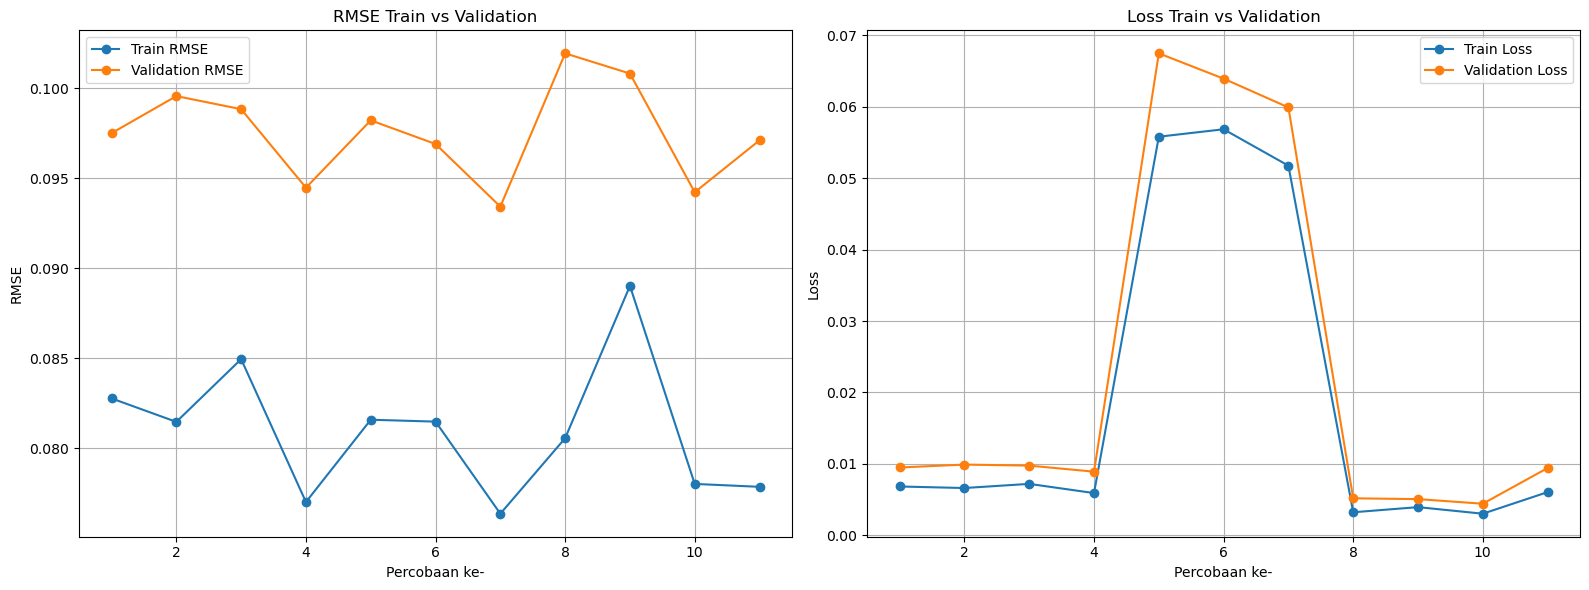


=== Percobaan Terbaik ===
Percobaan ke-7
Train MAE: 0.0517
Val MAE: 0.0599
Train RMSE: 0.0764
Val RMSE: 0.0934
Train Loss: 0.0517
Val Loss: 0.0599
Model: MAE + Nadam()


In [21]:
# === Plot RMSE dan Loss ===
plt.figure(figsize=(16, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(results_df['Percobaan'], results_df['Train RMSE'], marker='o', label='Train RMSE')
plt.plot(results_df['Percobaan'], results_df['Val RMSE'], marker='o', label='Validation RMSE')
plt.title('RMSE Train vs Validation')
plt.xlabel('Percobaan ke-')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(results_df['Percobaan'], results_df['Train Loss'], marker='o', label='Train Loss')
plt.plot(results_df['Percobaan'], results_df['Val Loss'], marker='o', label='Validation Loss')
plt.title('Loss Train vs Validation')
plt.xlabel('Percobaan ke-')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# === Evaluasi Percobaan Terbaik ===
best_trial = results_df.loc[results_df['Val RMSE'].idxmin()]
print("\n=== Percobaan Terbaik ===")
print(f"Percobaan ke-{best_trial['Percobaan']}")
print(f"Train MAE: {best_trial['Train MAE']:.4f}")
print(f"Val MAE: {best_trial['Val MAE']:.4f}")
print(f"Train RMSE: {best_trial['Train RMSE']:.4f}")
print(f"Val RMSE: {best_trial['Val RMSE']:.4f}")
print(f"Train Loss: {best_trial['Train Loss']:.4f}")
print(f"Val Loss: {best_trial['Val Loss']:.4f}")
print(f"Model: {best_trial['Loss Function']} + {best_trial['Optimizer']}")

In [22]:
import matplotlib.pyplot as plt

# Fungsi plotting 10 percobaan per halaman
def plot_results(results_df, metric='Final MAE', per_page=10):
    total_experiments = len(results_df)
    pages = (total_experiments + per_page - 1) // per_page  # hitung jumlah halaman

    for page in range(pages):
        start_idx = page * per_page
        end_idx = min(start_idx + per_page, total_experiments)

        subset = results_df.iloc[start_idx:end_idx]

        plt.figure(figsize=(12, 6))
        plt.bar(subset['Percobaan'], subset[metric], color='skyblue')
        plt.xlabel('Percobaan')
        plt.ylabel(metric)
        plt.title(f'{metric} untuk Percobaan {start_idx + 1} - {end_idx}')
        plt.xticks(subset['Percobaan'])  # Biar angka percobaannya kelihatan
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Plot hasil untuk MAE
plot_results(results_df, metric='Final MAE')

# Plot hasil untuk MSE
plot_results(results_df, metric='Final MSE')

# Plot hasil untuk Loss
plot_results(results_df, metric='Final Loss')





























































KeyError: 'Final MAE'

<Figure size 1200x600 with 0 Axes>